1703


<Axes: xlabel='trade_date'>

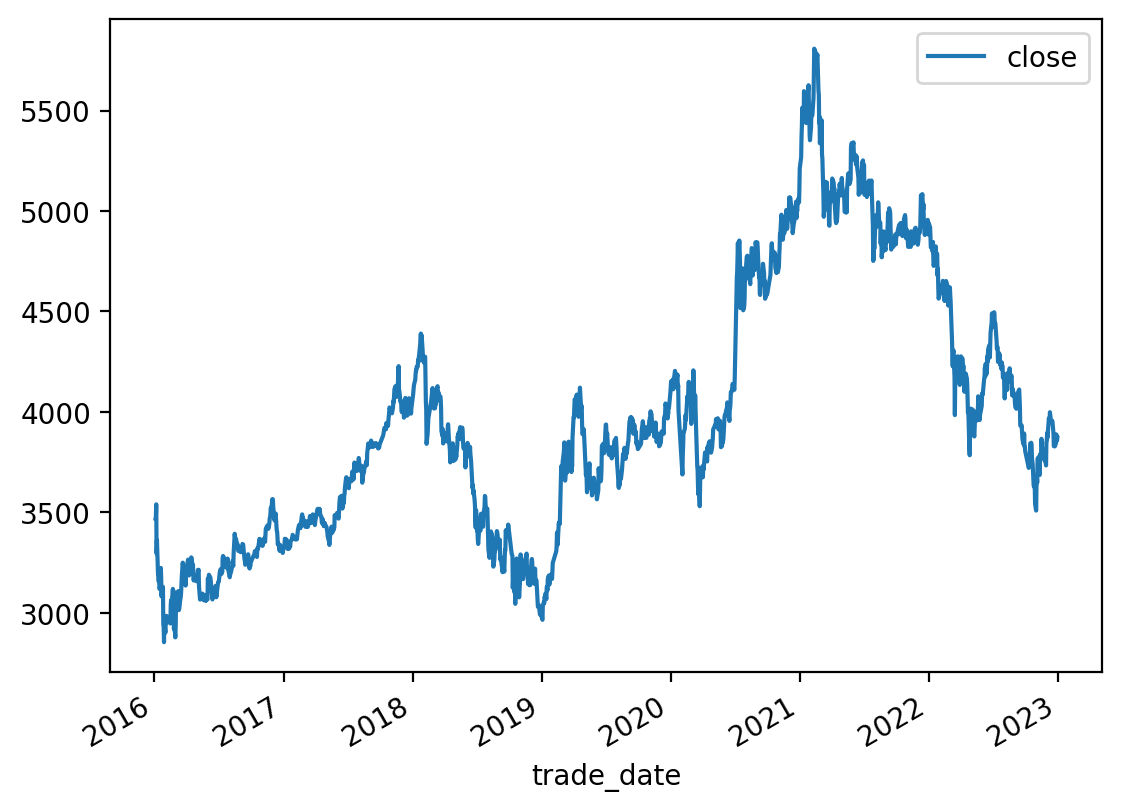

In [6]:
# packages and globals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# inline mat
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.dpi'] = 300
import tushare as ts
ts.set_token('4167d168dd2c182108319b0f5fc93d66b21d5ccf2baa2af2a522b80d')
pro = ts.pro_api()

# quiet 执行不显示warning
import warnings
warnings.filterwarnings('ignore')

start_date = '2016-01-01'
end_date = '2023-01-01'
# 沪深300指数
csi300_df = pro.index_daily(ts_code='000300.SH',
                            start_date=start_date,
                            end_date=end_date)
# date to datetime
csi300_df['trade_date'] = pd.to_datetime(csi300_df['trade_date'])
# sort csi300
csi300_df = csi300_df.sort_values(by='trade_date', ascending=True)
print(len(csi300_df))
csi300_df.plot(x='trade_date', y='close')


In [7]:
# columns to ['tic', 'date', 'close', 'open', 'high', 'low', 'volume','day']
# drop
csi300_df = csi300_df.drop(['pre_close', 'change', 'pct_chg', 'amount'], axis=1)
csi300_df = csi300_df.rename(columns={'trade_date': 'date','ts_code': 'tic', 'vol': 'volume'})
# cal day
csi300_df['day'] = csi300_df['date'].dt.dayofweek

csi300_df.head()

,tic,date,close,open,high,low,volume,day
1702,000300.SH,2016-01-04,3469.0662,3725.8561,3726.2446,3468.9485,115370674.0,0
1701,000300.SH,2016-01-05,3478.7797,3382.1769,3518.2170,3377.2799,162116984.0,1
1700,000300.SH,2016-01-06,3539.8082,3482.4064,3543.7394,3468.4666,145966144.0,2
1699,000300.SH,2016-01-07,3294.3839,3481.1499,3481.1499,3284.7374,44102641.0,3
1698,000300.SH,2016-01-08,3361.5632,3371.8710,3418.8508,3237.9307,185959451.0,4


In [8]:
# save
csi300_df.to_csv('datasets/csi300.csv', index=False)